In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Derivation of the AR(1) PSD from the Fourier Transform of an Exponentially Decaying ACF

First, validate the AR(1) PSD as the spectral representation of the exponentially decaying ACF. Note that and exponentially decaying ACF, $A(t)$, can be represented as the AR(1) coefficient, $\varphi$, which is the first lagged correlation of the ACF.

$$
\begin{align}
A(t) &= e^{\frac{-t}{\tau f_s}} \\
\tau &= -\frac{1}{\ln(\varphi) f_s} \\
A(t) &= \varphi^t
\end{align}
$$

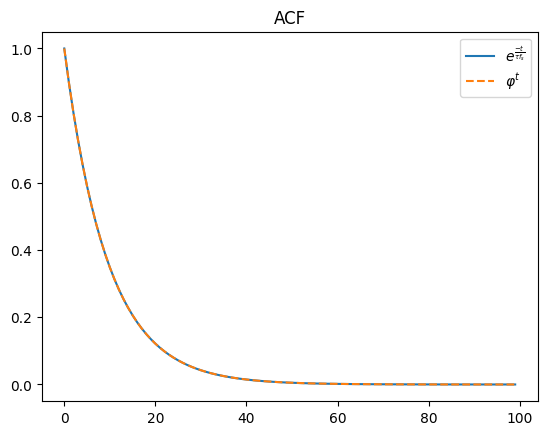

In [2]:
fs = 1000
phi = 0.9
tau = -1/(np.log(phi) * fs)
lags = np.arange(0, 100)

plt.plot(lags, np.exp(-lags / (tau * fs)), label=r"$e^{\frac{-t}{\tau f_s}}$")
plt.plot(lags, phi**lags, ls='--', label=r"$\varphi^t$")
plt.legend()
plt.title("ACF");

Take the discrete FT of the ACF is:

$$
\begin{align*}
FFT(f) &= \int_{-\infty}^{\infty} A(t) e^{-i 2 \pi f t} \, dt \\
&= \int_{-\infty}^{\infty} \varphi^t e^{-i 2 \pi f t} \, dt \\
&= \sum_{t=-\infty}^{\infty} \varphi^t e^{-i 2 \pi f \frac{1}{f_s} t} \quad\quad\quad \text{(discrete representation)} \\
&= \sum_{t=-\infty}^{\infty} \left(\varphi e^{-i 2 \pi f \frac{1}{f_s}}\right)^t
\end{align*}
$$

The sum of this geometric series is:

$$
\begin{align*}
FFT(f) &= \frac{1}{1 - \varphi e^{-i 2 \pi f \frac{1}{f_s}}}
\end{align*}
$$

The power spectral density is the absolute value squared of the Fourier transform of the ACF.

$$
\begin{align*}
P(f) &= \frac{1}{|1-\varphi e^{-i2\pi f \frac{1}{f_s}}|^2}
\end{align*}
$$

This is the form of an AR(1) PSD.

## Derivation of a Lorentizan PSD from an AR(1) PSD

#### Euler's formula to remove complex exponential

$$
\begin{align}
P(f) &= \frac{1}{|1-\varphi e^{-i2\pi f \frac{1}{f_s}}|^2} \\
&= \frac{1}{(1-\varphi e^{-i 2 \pi f \frac{1}{f_s}})(1-\varphi e^{i 2 \pi f \frac{1}{f_s}})} \\
&= \frac{1}{1-\varphi e^{-i 2 \pi f \frac{1}{f_s}} - \varphi e^{i 2 \pi f \frac{1}{f_s}} + \varphi^2} \\
&= \frac{1}{1 - \varphi (e^{-i 2 \pi f \frac{1}{f_s}} + e^{i 2 \pi f \frac{1}{f_s}}) + \varphi^2} \\
&= \frac{1}{1 - 2 \varphi \cos{(2 \pi f \frac{1}{f_s})}  + \varphi^2} \quad\quad\quad \text{(Euler's formula)}
\end{align}
$$

#### 1st order Taylor approximation of the cosine term
This gives bias in the high frequencies. This could be alleviate by lowering the upper frequency bound during fitting.

$$
\begin{align}
\cos(2 \pi f \frac{1}{f_s}) &\approxeq 1 - \frac{(2 \pi f \frac{1}{f_s})^2}{2} \\
P(f) & \approxeq \frac{1}{1 - 2\varphi (1 - \frac{(2 \pi f \frac{1}{f_s})^2}{2}) + \varphi^2}
\end{align}
$$

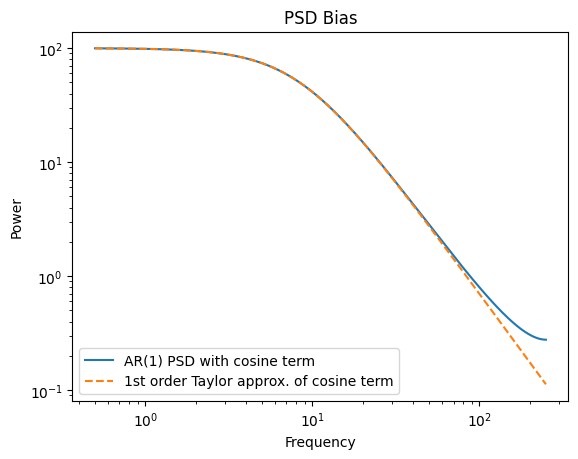

In [3]:
# Bias
fs = 500.
freqs = np.linspace(.5, fs/2, 2000)
phi = 0.9

plt.loglog(freqs, 1/(1 -2 * phi * np.cos(2*np.pi*freqs*1/fs) + phi**2), label='AR(1) PSD with cosine term')
plt.loglog(freqs, 1/(1 -2 * phi * (1 - ((2*np.pi*freqs*1/fs)**2 * 0.5)) + phi**2), label='1st order Taylor approx. of cosine term', ls='--')
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("PSD Bias")
plt.legend();

#### Rearrange and factor the quadratic term

$$
\begin{align}
P(f) & \approxeq \frac{1}{1 - 2\varphi (1 - \frac{(2 \pi f \frac{1}{f_s})^2}{2}) + \varphi^2} \\
&= \frac{1}{1 - 2\varphi + \varphi (\frac{2 \pi f}{f_s})^2 + \varphi^2} \\
&= \frac{1}{\varphi^2 - 2\varphi + 1 + \varphi (\frac{2 \pi f}{f_s})^2} \\
&= \frac{1}{(1-\varphi)^2 + \varphi (\frac{2 \pi f}{f_s})^2} \quad\quad\quad \text{Factored quadratic term}\\
&= \frac{\frac{1}{\varphi}}{\frac{(1-\varphi)^2}{\varphi} + (\frac{2 \pi f}{f_s})^2} \quad\quad\quad \text{Multiply each term by } \frac{1}{\varphi} \text{ to isolate } f
\end{align}
$$

Let constant scaling factors be absorbed in $b$, e.g. the numerator of where we left off. This term translates the PSD along the y-axis and allows us to multiply all terms with constants, e.g. $(\frac{2 \pi}{f_s})^2$:

$$
\begin{align}
P(f) &\approxeq \frac{b}{\frac{(1-\varphi)^2}{\varphi} + (\frac{2 \pi f}{f_s})^2} \\
&= \frac{b}{\frac{(1-\varphi)^2}{\varphi} (\frac{f_s}{2 \pi})^2 + f^2} \\
&= \frac{b}{(\frac{(1-\varphi)}{\sqrt{\varphi}} \cdot \frac{f_s}{2 \pi})^2 + f^2} \\
\end{align}
$$

Next, $\frac{(1-\varphi)}{\sqrt{\varphi}}$ needs to be approximated using $-\ln(x)$. This leads to the commonly used Lorentzian form. Take the first order approximations of these two forms around $\varphi = 1$:

$$
\begin{align}
\frac{(1-\varphi)}{\sqrt{\varphi}} \approxeq 0 - 1 (x+1) = -x-1 \\
-\ln(\varphi) \approxeq 0 - 1 (x+1) = -x-1
\end{align}
$$

Since we took the approximations around $\varphi = 1$, bias increases as $\varphi \to 0$.

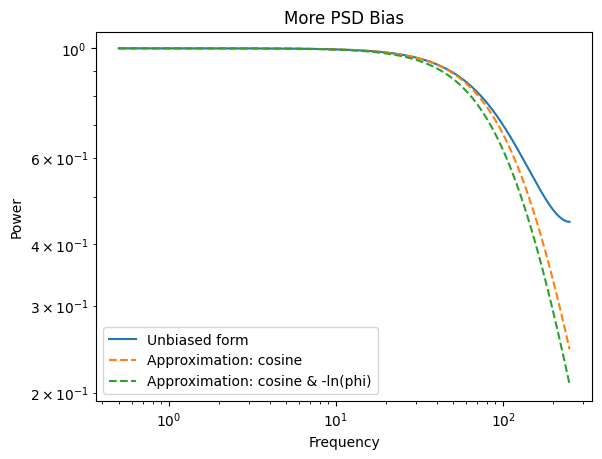

In [4]:
# Bias
fs = 500.
freqs = np.linspace(.5, fs/2, 4000)
phi = 0.9

# Show bias as phi -> 0
phi = 0.2

# Unbiased form
p0 = 1/(1 -2 * phi * np.cos(2*np.pi*freqs*1/fs) + phi**2)

# Less biased form
p1 = 1 / ((((1 - phi)/np.sqrt(phi)) * (fs / (2*np.pi)))**2 + freqs**2)

# Biased approximation
p2 = 1 / ((-np.log(phi) * (fs/(2*np.pi)))**2 + freqs**2)

# Normalize scaling
p0 = p0 / p0[0]
p1 = p1 / p1[0]
p2 = p2 / p2[0]

# Plot
plt.loglog(freqs, p0, label="Unbiased form")
plt.loglog(freqs, p1, ls='--', label='Approximation: cosine')
plt.loglog(freqs, p2, ls='--', label="Approximation: cosine & -ln(phi)")
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.title("More PSD Bias");

Substituting the natural log appoximation:

$$
\begin{align}
P(f) &\approxeq \frac{b}{(\frac{(1-\varphi)}{\sqrt{\varphi}} \cdot \frac{f_s}{2 \pi})^2 + f^2} \\
&= \frac{b}{(-\ln(\varphi) \cdot \frac{f_s}{2 \pi})^2 + f^2} \\
\end{align}
$$

Remember that $\varphi$ is related to $\tau$ through the following, where $f_s$ is sampling rate:


$$
\begin{align}
\varphi &= e^{\frac{-1}{\tau f_s}} \quad\quad\quad \text{(e.g. the first lagged correlation of the ACF)} \\
\tau &= -\frac{1}{\ln(\varphi) f_s}
\end{align}
$$

Now we can substitute $\tau$ in:

$$
\begin{align}
P(f) &\approxeq \frac{b}{(-\ln(\varphi) \cdot \frac{f_s}{2 \pi})^2 + f^2} \\
&= \frac{b}{(\frac{1}{2 \pi \tau})^2 + f^2} \\
\end{align}
$$


Finally, this leads us to the approximation of the knee frequency and a commonly used PSD form:

$$
\begin{align}
f_k &= \frac{1}{2 \pi \tau} \\
P(f) &\approxeq \frac{b}{f_k^2 + f^2} \\
\end{align}
$$

## Summary

1) The AR(1) PSD is the the spectral representation of an exponentially decaying ACF, confirmed using the Fourier transform and Wiener–Khinchin theorem.

$$
\begin{align}
A(t) &= \varphi^t \\
FFT(f) &= \sum_{t=-\infty}^{\infty} \left(\varphi e^{-i 2 \pi f \frac{1}{f_s}}\right)^t \\
&= \frac{1}{1 - \varphi e^{-i 2 \pi f \frac{1}{f_s}}} \\
P(f) &= |FFT(f)|^2 \\
&= \frac{1}{|1-\varphi e^{-i2\pi f \frac{1}{f_s}}|^2}
\end{align}
$$

2) There are two sources of bias in the commonly use Lorentzian spectral form: a cosine approximation and an approximation of $\frac{1-\varphi}{\sqrt{\varphi}}$. This leads bias as $\varphi$ becomes smaller, timescales become shorter, or as the knee frequency approaches the Nyquist frequency. Instead, it's recommended to learn $\varphi$ and $\tau$ the AR(1) form:

$$
\begin{align}
P(f) &= \frac{1}{|1-\varphi e^{-i2\pi f \frac{1}{f_s}}|^2} \\
&= \frac{1}{1 - 2 \varphi \cos{(2 \pi f \frac{1}{f_s})}  + \varphi^2}
\end{align}
$$

where

$$
\begin{align}
\tau &= -\frac{1}{\ln(\varphi) f_s}
\end{align}
$$

The knee frequency is not recommended due these sources of bias and poor interpretations, e.g. stochastic processes to not oscillate like is suggested by a frequency.